# Credit Scoring — Machine Learning Classification

## Problem Statement
Credit scoring is a fundamental problem in the banking industry, where the objective is to estimate the likelihood of customer default based on historical and behavioral data.

In this project, we build a machine learning model to predict credit risk using high-dimensional tabular data.


In [1]:
import pandas as pd

In [2]:
df_train = pd.read_parquet('./parquets/P03_train.pq')
df_test = pd.read_parquet('./parquets/P03_test.pq')

## Dataset Overview

- Training data shape: (175,000 rows × 61 features)
- Test data shape: (75,000 rows × 60 features)
- Target variable: binary indicator of default

The dataset contains numerical and categorical features derived from customer profiles and aggregated transaction histories.


In [3]:
print(df_train.shape, df_test.shape)

(175000, 61) (75000, 60)


In [4]:
df_train.head()

,id,flag,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,41794,0,3,9,16,9,15,14,16,3,...,3,3,3,4,1,3,4,1,0,0
1,160704,0,9,6,0,1,0,4,1,3,...,3,3,3,4,1,2,3,1,0,0
2,41771,0,12,16,14,8,10,11,10,2,...,3,3,3,4,1,2,3,1,0,1
3,160727,0,7,9,17,16,14,8,14,3,...,3,3,3,4,1,2,4,1,0,0
4,160729,0,9,9,4,8,1,11,10,3,...,3,3,3,4,1,2,3,1,1,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   id                             175000 non-null  int64
 1   flag                           175000 non-null  int64
 2   pre_since_opened               175000 non-null  int64
 3   pre_since_confirmed            175000 non-null  int64
 4   pre_pterm                      175000 non-null  int64
 5   pre_fterm                      175000 non-null  int64
 6   pre_till_pclose                175000 non-null  int64
 7   pre_till_fclose                175000 non-null  int64
 8   pre_loans_credit_limit         175000 non-null  int64
 9   pre_loans_next_pay_summ        175000 non-null  int64
 10  pre_loans_outstanding          175000 non-null  int64
 11  pre_loans_total_overdue        175000 non-null  int64
 12  pre_loans_max_overdue_sum      175000 non-null  int64
 13 

In [6]:
df_train.shape

(175000, 61)

## Exploratory Data Analysis (EDA)

The purpose of this section is to inspect the structure of the data, identify missing values, and understand feature distributions prior to modeling.


In [7]:
df_train.isnull().sum()

id                         0
flag                       0
pre_since_opened           0
pre_since_confirmed        0
pre_pterm                  0
                          ..
enc_loans_credit_status    0
enc_loans_credit_type      0
enc_loans_account_cur      0
pclose_flag                0
fclose_flag                0
Length: 61, dtype: int64

we don't have any null values, so we don't need to fill out null values

In [8]:
df_train['flag'].value_counts(normalize=True)


flag
0    0.968994
1    0.031006
Name: proportion, dtype: float64

so it's is clear that 1 is bad customer, and we see there is big class imbalance 

In [9]:
df_train.describe()

,id,flag,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,...,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,124988.536383,0.031006,10.594600,7.928571,7.960674,8.480663,6.470000,9.372623,9.631691,2.677589,...,2.725520,2.742063,2.757234,3.877903,1.032274,2.218137,3.329383,1.000206,0.276686,0.468869
std,72212.682773,0.173334,5.875207,4.216644,5.444405,3.594472,5.205496,3.270286,5.754680,1.790457,...,0.857159,0.833652,0.811288,0.587919,0.285895,0.450885,1.007710,0.028081,0.447361,0.499031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62467.500000,0.000000,7.000000,6.000000,4.000000,8.000000,1.000000,8.000000,5.000000,2.000000,...,3.000000,3.000000,3.000000,4.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000
50%,125015.500000,0.000000,11.000000,9.000000,6.000000,8.000000,8.000000,11.000000,10.000000,2.000000,...,3.000000,3.000000,3.000000,4.000000,1.000000,2.000000,4.000000,1.000000,0.000000,0.000000
75%,187562.250000,0.000000,17.000000,9.000000,14.000000,9.000000,11.000000,11.000000,15.000000,4.000000,...,3.000000,3.000000,3.000000,4.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000
max,249999.000000,1.000000,19.000000,17.000000,17.000000,16.000000,16.000000,15.000000,19.000000,6.000000,...,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,5.000000,2.000000,1.000000,1.000000


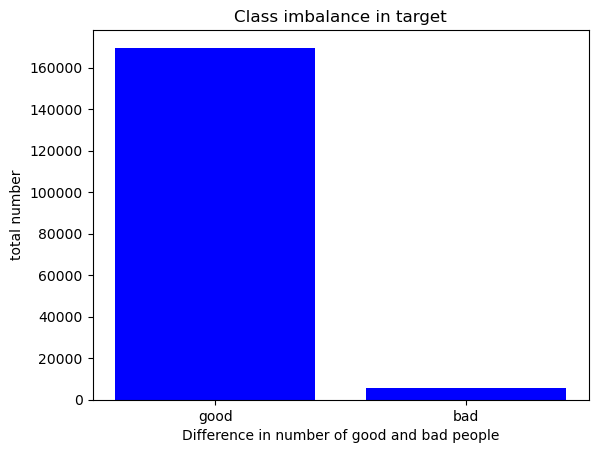

In [10]:
import matplotlib.pyplot as plt
plt.bar(["good", "bad"], df_train['flag'].value_counts(), color='blue')
plt.title("Class imbalance in target")
plt.xlabel('Difference in number of good and bad people')
plt.ylabel("total number")
plt.show()

since we have big class imbalance it is important to use stratified in train test split and weighted balance

In [11]:
import numpy as np
import seaborn as sns

let's try to drop duplicates

In [12]:
df_train.shape

(175000, 61)

we don't have duplicates, nice

now let's decide on columns

detect multicollinearity

In [13]:
df_train.nunique().reset_index()

,index,0
0,id,175000
1,flag,2
2,pre_since_opened,20
3,pre_since_confirmed,18
4,pre_pterm,18
...,...,...
56,enc_loans_credit_status,7
57,enc_loans_credit_type,6
58,enc_loans_account_cur,3
59,pclose_flag,2


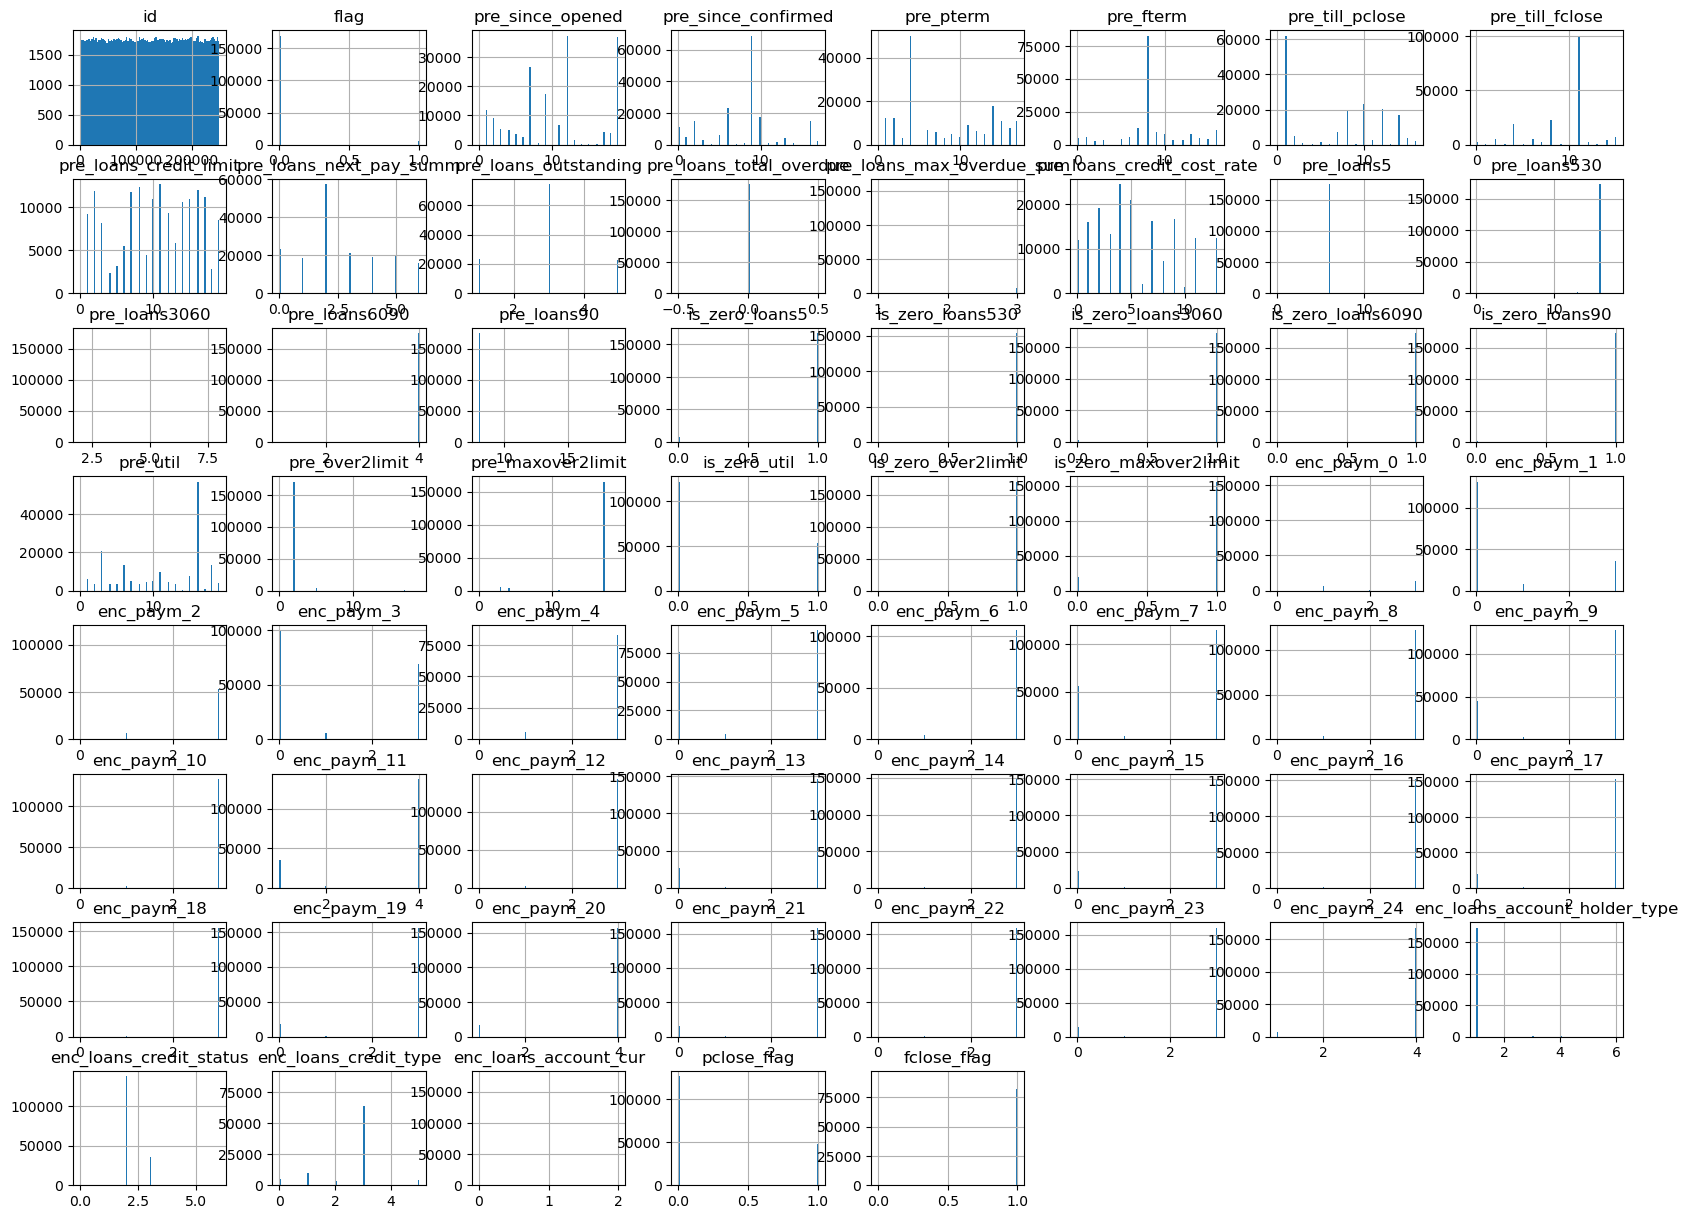

In [14]:
df_train.hist(bins=100, figsize=(20, 15))
plt.show()

In [15]:
df_train.corr()

,id,flag,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
id,1.000000,0.002102,0.020936,0.010621,-0.022938,0.002555,-0.026467,0.011450,-0.002617,0.007051,...,0.012063,0.011600,0.011560,-0.003190,0.003218,-0.021205,-0.022709,0.000737,0.037522,0.036921
flag,0.002102,1.000000,0.029626,0.008440,-0.011297,0.000339,-0.007038,-0.006622,0.013717,-0.001521,...,0.022628,0.022405,0.021384,0.013934,-0.010738,0.001418,0.034343,-0.001310,0.011327,0.004883
pre_since_opened,0.020936,0.029626,1.000000,-0.002315,-0.057657,0.005051,0.014638,-0.008549,0.000855,0.030396,...,0.091865,0.084003,0.071315,0.040486,-0.013674,-0.186706,0.020602,0.001233,0.066586,0.099857
pre_since_confirmed,0.010621,0.008440,-0.002315,1.000000,-0.034336,0.025756,0.004854,-0.089571,0.002175,0.004354,...,-0.024163,-0.023580,-0.023594,-0.003368,-0.012370,-0.006848,0.029785,0.002971,0.050797,-0.038394
pre_pterm,-0.022938,-0.011297,-0.057657,-0.034336,1.000000,-0.002851,0.345057,-0.072617,-0.006491,0.003187,...,0.097252,0.098604,0.100807,0.027947,-0.051734,0.062044,0.060892,0.001660,-0.449935,-0.199494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
enc_loans_credit_status,-0.021205,0.001418,-0.186706,-0.006848,0.062044,-0.089588,0.052557,-0.123936,0.014907,-0.080738,...,-0.044224,-0.044445,-0.043969,-0.033544,-0.055724,1.000000,0.070468,0.023987,-0.156215,-0.408616
enc_loans_credit_type,-0.022709,0.034343,0.020602,0.029785,0.060892,0.119639,0.172599,-0.034105,0.081180,-0.032835,...,0.076096,0.075218,0.074331,0.094137,-0.314365,0.070468,1.000000,-0.016126,-0.090070,-0.245440
enc_loans_account_cur,0.000737,-0.001310,0.001233,0.002971,0.001660,-0.001319,0.004069,-0.009422,-0.002784,-0.002659,...,0.001159,0.000070,-0.000818,-0.014400,0.007714,0.023987,-0.016126,1.000000,-0.007260,-0.010553
pclose_flag,0.037522,0.011327,0.066586,0.050797,-0.449935,-0.066448,-0.649915,0.271993,0.053792,-0.004037,...,-0.046042,-0.047709,-0.052040,0.105459,0.020028,-0.156215,-0.090070,-0.007260,1.000000,0.554479


we have to drop some columns

drop id columns as it doesn't benefit our training model t all and 

In [16]:
df_train = df_train.drop(columns='id', axis=1)

In [17]:
df_train.head()

,flag,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,3,9,16,9,15,14,16,3,3,...,3,3,3,4,1,3,4,1,0,0
1,0,9,6,0,1,0,4,1,3,4,...,3,3,3,4,1,2,3,1,0,0
2,0,12,16,14,8,10,11,10,2,3,...,3,3,3,4,1,2,3,1,0,1
3,0,7,9,17,16,14,8,14,3,5,...,3,3,3,4,1,2,4,1,0,0
4,0,9,9,4,8,1,11,10,3,3,...,3,3,3,4,1,2,3,1,1,1


In [18]:
df_train.columns

Index(['flag', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 'enc

let's divide data and see how each column correlates with target and then pick the best

In [19]:
pre_features = list(df_train.columns[1:18])
iszero_features = list(df_train.columns[19:30])
enc_features1 = list(df_train.columns[31:47])
enc_features2 = list(df_train.columns[48:61])

In [20]:
pre_features.append('flag')
corr = df_train[pre_features].corr()

In [21]:
abs(corr)

,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,flag
pre_since_opened,1.000000,0.002315,0.057657,0.005051,0.014638,0.008549,0.000855,0.030396,0.003883,NaN,0.001373,0.008130,0.017816,0.025945,0.010110,0.001930,0.004650,0.029626
pre_since_confirmed,0.002315,1.000000,0.034336,0.025756,0.004854,0.089571,0.002175,0.004354,0.007717,NaN,0.000005,0.007356,0.005519,0.009156,0.008651,0.001239,0.003134,0.008440
pre_pterm,0.057657,0.034336,1.000000,0.002851,0.345057,0.072617,0.006491,0.003187,0.018458,NaN,0.013964,0.001488,0.003245,0.020064,0.002306,0.003012,0.000552,0.011297
pre_fterm,0.005051,0.025756,0.002851,1.000000,0.255730,0.017770,0.012657,0.009943,0.019312,NaN,0.031142,0.030976,0.003108,0.033006,0.000545,0.000214,0.004986,0.000339
pre_till_pclose,0.014638,0.004854,0.345057,0.255730,1.000000,0.161319,0.021457,0.013998,0.030758,NaN,0.041395,0.009695,0.028470,0.018844,0.007485,0.000687,0.000671,0.007038
pre_till_fclose,0.008549,0.089571,0.072617,0.017770,0.161319,1.000000,0.050410,0.021329,0.111711,NaN,0.019463,0.063421,0.018762,0.000249,0.006106,0.003326,0.002193,0.006622
pre_loans_credit_limit,0.000855,0.002175,0.006491,0.012657,0.021457,0.050410,1.000000,0.005357,0.083758,NaN,0.008072,0.065253,0.002611,0.002202,0.000923,0.002903,0.000815,0.013717
pre_loans_next_pay_summ,0.030396,0.004354,0.003187,0.009943,0.013998,0.021329,0.005357,1.000000,0.067972,NaN,0.022960,0.047938,0.011291,0.001744,0.003395,0.001567,0.004891,0.001521
pre_loans_outstanding,0.003883,0.007717,0.018458,0.019312,0.030758,0.111711,0.083758,0.067972,1.000000,NaN,0.006407,0.128755,0.004146,0.012282,0.000816,0.001189,0.001489,0.018824
pre_loans_total_overdue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_train['pre_loans_total_overdue'].value_counts()

pre_loans_total_overdue
0    175000
Name: count, dtype: int64

## Data Preprocessing

The following preprocessing steps were applied:
- Handling missing values
- Encoding categorical variables
- Feature scaling where required
- Train–validation split

These steps prepare the data for gradient boosting models and ensure stable training.


In [23]:
iszero_features.append('flag')
corr = df_train[iszero_features].corr()

In [24]:
abs(corr)

,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,flag
is_zero_loans530,1.000000,0.144714,0.095336,0.075788,0.044119,0.049188,0.367032,0.067691,0.035384,0.679742,0.014416,0.040554
is_zero_loans3060,0.144714,1.000000,0.644827,0.534394,0.041215,0.099199,0.113044,0.064623,0.140073,0.102984,0.082798,0.044835
is_zero_loans6090,0.095336,0.644827,1.000000,0.728110,0.034907,0.093243,0.097706,0.055518,0.139377,0.080855,0.090529,0.046163
is_zero_loans90,0.075788,0.534394,0.728110,1.000000,0.035117,0.120667,0.105804,0.055166,0.167360,0.096575,0.107434,0.042736
pre_util,0.044119,0.041215,0.034907,0.035117,1.000000,0.036597,0.009619,0.565943,0.049886,0.009932,0.040698,0.027557
pre_over2limit,0.049188,0.099199,0.093243,0.120667,0.036597,1.000000,0.470812,0.074660,0.715085,0.345351,0.075403,0.015267
pre_maxover2limit,0.367032,0.113044,0.097706,0.105804,0.009619,0.470812,1.000000,0.016203,0.547302,0.695555,0.047152,0.027991
is_zero_util,0.067691,0.064623,0.055518,0.055166,0.565943,0.074660,0.016203,1.000000,0.107308,0.005286,0.012133,0.028196
is_zero_over2limit,0.035384,0.140073,0.139377,0.167360,0.049886,0.715085,0.547302,0.107308,1.000000,0.482951,0.099963,0.015308
is_zero_maxover2limit,0.679742,0.102984,0.080855,0.096575,0.009932,0.345351,0.695555,0.005286,0.482951,1.000000,0.032709,0.033863


In [25]:
enc_features1.append('flag')
corr = df_train[enc_features1].corr()

In [26]:
abs(corr)

,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,flag
enc_paym_2,1.000000,0.804184,0.679128,0.589491,0.513902,0.458775,0.416986,0.383521,0.352314,0.325776,0.298049,0.279957,0.266692,0.255298,0.244812,0.234652,0.057118
enc_paym_3,0.804184,1.000000,0.837288,0.727382,0.634624,0.566902,0.515523,0.473870,0.435717,0.402846,0.368454,0.345422,0.328868,0.314776,0.301506,0.289030,0.054696
enc_paym_4,0.679128,0.837288,1.000000,0.862176,0.751397,0.671152,0.610678,0.562002,0.516502,0.477760,0.437190,0.409234,0.389365,0.372598,0.357169,0.342517,0.051555
enc_paym_5,0.589491,0.727382,0.862176,1.000000,0.865275,0.772297,0.702561,0.646360,0.594054,0.549506,0.502481,0.470424,0.447537,0.428446,0.410683,0.394118,0.047368
enc_paym_6,0.513902,0.634624,0.751397,0.865275,1.000000,0.886166,0.805628,0.740870,0.681224,0.630177,0.576031,0.539002,0.512999,0.490932,0.470427,0.451414,0.045844
enc_paym_7,0.458775,0.566902,0.671152,0.772297,0.886166,1.000000,0.903209,0.830131,0.763395,0.705995,0.645093,0.603580,0.574571,0.549843,0.527161,0.506008,0.042857
enc_paym_8,0.416986,0.515523,0.610678,0.702561,0.805628,0.903209,1.000000,0.913789,0.839261,0.775629,0.709096,0.662763,0.631109,0.603697,0.578907,0.555713,0.040645
enc_paym_9,0.383521,0.473870,0.562002,0.646360,0.740870,0.830131,0.913789,1.000000,0.913176,0.843088,0.769771,0.719166,0.684698,0.655069,0.628068,0.602821,0.037363
enc_paym_10,0.352314,0.435717,0.516502,0.594054,0.681224,0.763395,0.839261,0.913176,1.000000,0.917820,0.837428,0.781949,0.744328,0.711852,0.682346,0.654704,0.035237
enc_paym_11,0.325776,0.402846,0.477760,0.549506,0.630177,0.705995,0.775629,0.843088,0.917820,1.000000,0.907376,0.846503,0.805255,0.769876,0.738179,0.708419,0.034524


In [27]:
enc_features2.append('flag')
corr = df_train[enc_features2].corr()

In [28]:
abs(corr)

,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
enc_paym_19,1.000000,0.957174,0.919241,0.886603,0.855796,0.589774,0.015599,0.042937,0.077974,0.001853,0.041081,0.049548,0.025350
enc_paym_20,0.957174,1.000000,0.956127,0.921321,0.889523,0.613997,0.014819,0.043682,0.077156,0.001975,0.042627,0.049588,0.023964
enc_paym_21,0.919241,0.956127,1.000000,0.959063,0.924862,0.638063,0.015104,0.044224,0.076096,0.001159,0.046042,0.050368,0.022628
enc_paym_22,0.886603,0.921321,0.959063,1.000000,0.959905,0.662066,0.014533,0.044445,0.075218,0.000070,0.047709,0.049788,0.022405
enc_paym_23,0.855796,0.889523,0.924862,0.959905,1.000000,0.687362,0.013892,0.043969,0.074331,0.000818,0.052040,0.050213,0.021384
enc_paym_24,0.589774,0.613997,0.638063,0.662066,0.687362,1.000000,0.036594,0.033544,0.094137,0.014400,0.105459,0.007648,0.013934
enc_loans_account_holder_type,0.015599,0.014819,0.015104,0.014533,0.013892,0.036594,1.000000,0.055724,0.314365,0.007714,0.020028,0.043691,0.010738
enc_loans_credit_status,0.042937,0.043682,0.044224,0.044445,0.043969,0.033544,0.055724,1.000000,0.070468,0.023987,0.156215,0.408616,0.001418
enc_loans_credit_type,0.077974,0.077156,0.076096,0.075218,0.074331,0.094137,0.314365,0.070468,1.000000,0.016126,0.090070,0.245440,0.034343
enc_loans_account_cur,0.001853,0.001975,0.001159,0.000070,0.000818,0.014400,0.007714,0.023987,0.016126,1.000000,0.007260,0.010553,0.001310


In [29]:
df_train = df_train[[
                    'flag', 'is_zero_loans530', 'is_zero_loans3060', 
                    'is_zero_loans6090', 'is_zero_loans90', 'is_zero_maxover2limit', 
                    'is_zero_util', 'is_zero_over2limit',

                    'enc_loans_credit_type', 'enc_loans_credit_status',
                    'pre_since_opened', 'pre_util', 'pre_maxover2limit', 
                    'pre_loans_max_overdue_sum', 'pre_loans_credit_limit', 
                    'pre_loans_credit_cost_rate', 'pre_loans5',

                    'enc_paym_0',
                    'enc_paym_2', 'enc_paym_3',	'enc_paym_4', 'enc_paym_5', 
                    'enc_paym_6', 
                    'enc_paym_7', 'enc_paym_9',	'enc_paym_10', 'enc_paym_11', 
                    'enc_paym_13', 'enc_paym_16', 'enc_paym_8', 'enc_paym_12', 
                    'enc_paym_14', 'enc_paym_15',
                    'enc_paym_17'
    
]]


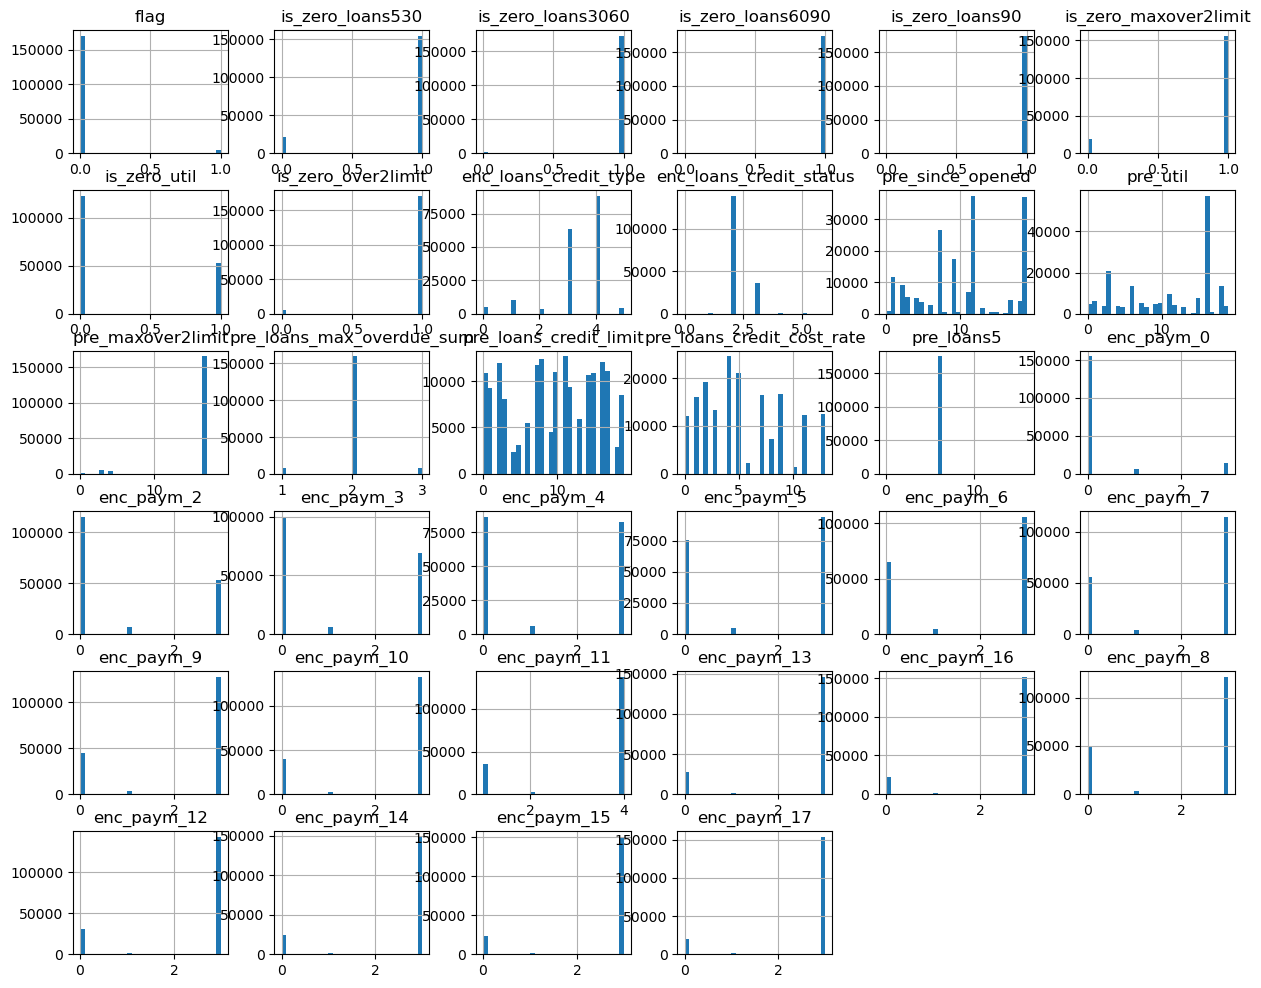

In [30]:
df_train.hist(bins=30, figsize=(15, 12))
plt.show()

In [31]:
binar = ['is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 
        'is_zero_loans90', 'is_zero_maxover2limit', 'is_zero_util', 'is_zero_over2limit']

categor = ['enc_loans_credit_type', 'enc_loans_credit_status']

contin = ['pre_since_opened', 'pre_util', 'pre_maxover2limit', 'pre_loans_max_overdue_sum', 'pre_loans_credit_limit', 'pre_loans_credit_cost_rate', 'pre_loans5']

contin1 = ['enc_paym_0',
                   'enc_paym_2', 'enc_paym_3',	'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 
                   'enc_paym_7', 'enc_paym_9',	'enc_paym_10', 'enc_paym_11', 
                   'enc_paym_13', 'enc_paym_16', 'enc_paym_8', 'enc_paym_12', 'enc_paym_14', 'enc_paym_15',
                   'enc_paym_17']


In [32]:
X = df_train.drop('flag', axis=1)
y = df_train['flag']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y 
)


<Axes: xlabel='flag', ylabel='pre_since_opened'>

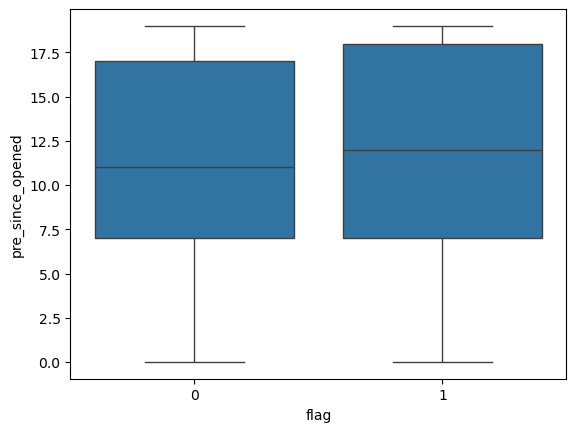

In [34]:
sns.boxplot(x="flag", y="pre_since_opened", data=df_train)

<Axes: xlabel='flag', ylabel='pre_util'>

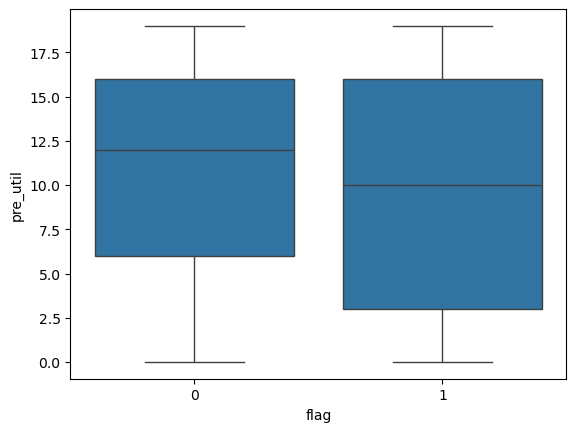

In [35]:
sns.boxplot(x="flag", y="pre_util", data=df_train)

<Axes: xlabel='flag', ylabel='pre_loans_credit_cost_rate'>

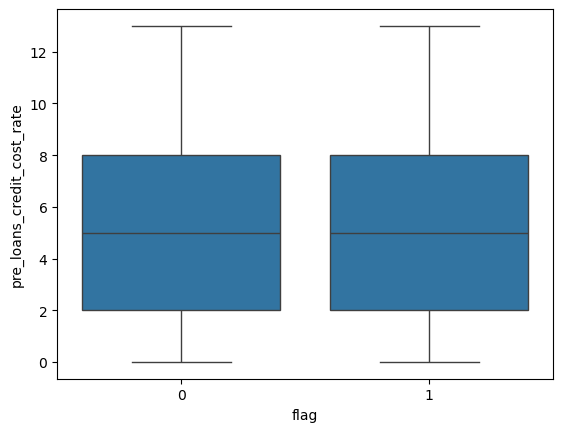

In [36]:
# sns.boxplot(x="flag", y="pre_maxover2limit", data=df_train)
# sns.boxplot(x="flag", y="pre_loans_outstanding", data=df_train)
# # sns.boxplot(x="flag", y="pre_loans_total_overdue", data=df_train)
# sns.boxplot(x="flag", y="pre_loans_max_overdue", data=df_train)
# sns.boxplot(x="flag", y="pre_loans_credit_limit", data=df_train)
sns.boxplot(x="flag", y="pre_loans_credit_cost_rate", data=df_train)

In [37]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
x_train_num_sc = sc.fit_transform(X_train[contin])
x_val_num_sc = sc.transform(X_test[contin])

In [38]:
df_contin1 = df_train[contin1]
df_contin1.nunique().reset_index()

,index,0
0,enc_paym_0,4
1,enc_paym_2,4
2,enc_paym_3,4
3,enc_paym_4,4
4,enc_paym_5,4
5,enc_paym_6,4
6,enc_paym_7,4
7,enc_paym_9,4
8,enc_paym_10,4
9,enc_paym_11,4


In [39]:
# now scale done, lets encode

x_train_sh = pd.get_dummies(X_train[categor], prefix='credit_type')
x_val_sh = pd.get_dummies(X_test[categor], prefix='credit_type')

x_train_sh, x_val_sh = x_train_sh.align(x_val_sh, join='left', axis=1, fill_value=0)


In [40]:
x_train_bin = X_train[['is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 
        'is_zero_loans90', 'is_zero_maxover2limit', 'is_zero_util', 'is_zero_over2limit']]
x_val_bin   = X_test[['is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 
        'is_zero_loans90', 'is_zero_maxover2limit', 'is_zero_util', 'is_zero_over2limit']]

In [41]:
x_train_cont1 = X_train[['enc_paym_0',
                   'enc_paym_2', 'enc_paym_3',	'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 
                   'enc_paym_7',	 'enc_paym_9',	'enc_paym_10', 'enc_paym_11', 
                   'enc_paym_13', 'enc_paym_16', 'enc_paym_8', 'enc_paym_15', 'enc_paym_14', 'enc_paym_12',
                   'enc_paym_17']]
x_val_cont1 = X_test[['enc_paym_0',
                   'enc_paym_2', 'enc_paym_3',	'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 
                   'enc_paym_7', 'enc_paym_9',	'enc_paym_10', 'enc_paym_11', 
                   'enc_paym_13', 'enc_paym_16', 'enc_paym_8', 'enc_paym_15', 'enc_paym_14', 'enc_paym_12',
                   'enc_paym_17']]

In [42]:
x_train_scaled_df = pd.DataFrame(x_train_num_sc, columns=contin, index=X_train.index)
x_val_scaled_df = pd.DataFrame(x_val_num_sc, columns=contin, index=X_test.index)

In [43]:
X_train = pd.concat(
    [
     x_train_cont1, 
     x_train_sh, 
     x_train_bin, 
     x_train_scaled_df
    ],
    axis=1
)

X_val = pd.concat(
    [
        x_val_cont1, 
        x_val_sh, 
        x_val_bin, 
        x_val_scaled_df
    ],
    axis=1
)

## Model Selection

Gradient boosting models are well-suited for high-dimensional tabular data.  
LightGBM was selected due to its efficiency, scalability, and ability to capture complex feature interactions.


In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(X_train, y_train)

y_pred_proba = base_model.predict_proba(X_val)[:, 1]

score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", score)


ROC AUC: 0.6618301393718127


## Hyperparameter Tuning

Hyperparameters were optimized using RandomizedSearchCV to efficiently explore the search space while balancing computational cost.


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

lgb = LGBMClassifier(random_state=42)

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'num_leaves': np.arange(16, 64, 8),
    'max_depth': np.arange(3, 10, 1),
    'min_child_samples': np.arange(10, 100, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
}

random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=10,                 
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [47]:
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

best_model = random_search.best_estimator_

y_train_pred = best_model.predict_proba(X_train)[:, 1]
y_val_pred = best_model.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_test, y_val_pred)

print(f"Train ROC-AUC: {train_auc:.3f}")
print(f"Validation ROC-AUC: {val_auc:.3f}")


Train ROC-AUC: 0.736
Validation ROC-AUC: 0.705


## Model Evaluation

Model performance was evaluated using classification metrics suitable for imbalanced datasets, with a primary focus on ROC-AUC.


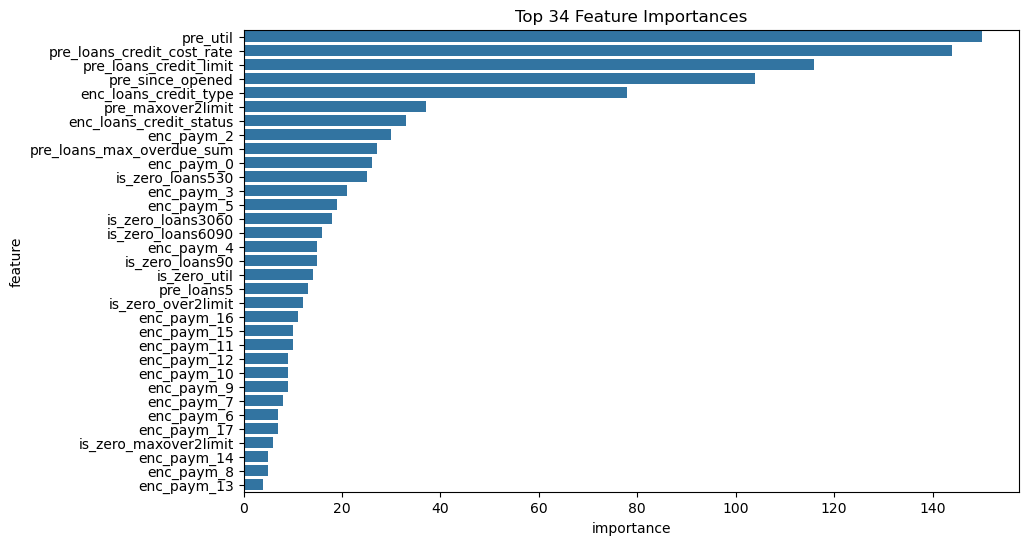

In [48]:
importance = best_model.feature_importances_
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(34), x='importance', y='feature')
plt.title('Top 34 Feature Importances')
plt.show()


In [49]:
cop = df_test.copy()
test_i = df_test['id']

cop = cop.drop(columns='id')

df_test = df_test[[ 
    'is_zero_loans530', 'is_zero_loans3060', 
    'is_zero_loans6090', 'is_zero_loans90', 'is_zero_maxover2limit', 
    'is_zero_util', 'is_zero_over2limit',

    'enc_loans_credit_type', 'enc_loans_credit_status',
    'pre_since_opened', 'pre_util', 'pre_maxover2limit', 
    'pre_loans_max_overdue_sum', 'pre_loans_credit_limit', 
    'pre_loans_credit_cost_rate', 'pre_loans5',

    'enc_paym_0', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 
    'enc_paym_6', 'enc_paym_7', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 
    'enc_paym_13', 'enc_paym_16', 'enc_paym_8', 'enc_paym_12', 
    'enc_paym_14', 'enc_paym_15', 'enc_paym_17'
]]

scaled = df_test.copy()
scaled[contin] = sc.transform(df_test[contin])

x_test_sh = pd.get_dummies(scaled[categor], prefix='credit_type')
x_test_sh, _ = x_test_sh.align(x_train_sh, join='right', axis=1, fill_value=0)

x_test_bin = scaled[binar]

x_test_scaled_df = pd.DataFrame(scaled[contin], columns=contin, index=scaled.index)

x_test_cont1 = scaled[contin1]

x_test_cont1 = x_test_cont1.reset_index(drop=True)
x_test_sh = x_test_sh.reset_index(drop=True)
x_test_bin = x_test_bin.reset_index(drop=True)
x_test_scaled_df = x_test_scaled_df.reset_index(drop=True)
X_test = pd.concat([x_test_cont1, x_test_sh, x_test_bin, x_test_scaled_df], axis=1)


y_test_pred = best_model.predict_proba(X_test)[:, 1]


In [50]:
proj4 = pd.DataFrame({'ID': test_i, 'predict_proba': y_test_pred})
proj4.to_csv('proj4.csv', index=False)

## Final Predictions

The trained model was used to generate predictions for the unseen test dataset, producing a final submission file in the required format.


## Conclusion

In this project, a full machine learning pipeline was developed for credit risk prediction using high-dimensional banking data.

Key takeaways:
- Gradient boosting models perform strongly on structured financial data
- Feature preprocessing and tuning are critical for stable performance
- The final model generalizes well to unseen samples

This project demonstrates practical experience with real-world credit scoring problems.
